# Manually Selection of the Most Likely Causal Genes from Significant TWAS Genes

## Aim

Genomewide MR was skipped due to missing `MAF` column in the imputed GWAS sumstats, and our [TWAS pipeline](https://github.com/rl3328/xqtl-protocol/blob/main/code/pecotmr_integration/twas_ctwas.ipynb) runs TWAS and MR in the same step (`twas`). This notebook serves as a quick rescue to manually diminish noise from LD hitchhiking and identify the most likely causal genes.



## Steps

### 1. Filter genes qualified for MR analysis

Most thresholds follow the default requirements in \[`twas`], except I use a stricter `twas_pval` cutoff. The reason is that I want to directly apply the filter to “significant” TWAS genes in my manuscript while also saving resources.

**Criteria:**

1. Strong and reliable TWAS signals:

   * `twas_pval < 2.5*1e-6`
   * `rsq_cv > 0.01`
   * `rsq_pval < 0.05`
2. Strong GWAS signals:

   * Have `CS`, which can be extracted from `twas_weight(.rds)` files

### 2. Manually select the most likely causal gene

Within each LD block and by context, I select the gene with top z score as causal gene.


## Note

There are some differences between this identification and the [loose gene list](https://github.com/rl3328/xqtl-analysis/blob/main/production/image_QTL/interested_genes/TWAS_QTL/loose_gene/image_Aging1_gene_list.tsv).

* Loose list: 42 genes, filtered by `is_selected_method` and `twas_pval < 2.5*1e-6`
* Current identification: 443 genes are strong TWAS genes(twas_pval < 2.5*1e-6 & rsq_cv > 0.01 & pval_cv < 0.05) for Aging1 and Knight cohort, 48 genes were identified as the final list.



## Input

1. **Merged TWAS results** (`*.twas.tsv.gz`):

   * `s3://statfungen/ftp_fgc_xqtl/interactive_analysis/rl3328/image_QTL/twas/image_Aging1_twas_merged.tsv.gz.combined_twas.tsv.gz`
2. **xQTL\_meta\_file** (meta file specifying TWAS weight paths by cohort):

   * `s3://statfungen/ftp_fgc_xqtl/interactive_analysis/cl4215/KNIGHT_eQTL_pQTL_twas_wgw_xqtl_meta_data.tsv`


## Plan

Other GWAS studies and other cohorts will be analyzed in the same way.


In [9]:
library(data.table)
library(tidyverse)
library(pecotmr)

In [10]:
setwd("~/data")

In [11]:
##Bonfferroni correction is too strict
# Aging1_twas = fread("~/project/image_QTL/twas/multiple_testing/image_Aging1_twas_bonff.bonf_corrected.tsv.gz")


In [12]:
Aging1_twas = fread("~/project/image_QTL/twas/image_Aging1_twas_merged.tsv.gz.combined_twas.tsv.gz")


In [13]:
# weight_db_list = fread("~/data/interactive_analysis/cl4215/KNIGHT_eQTL_pQTL_twas_wgw_xqtl_meta_data.tsv")
# weight_db_list = fread("~/project/image_QTL/twas/MSBB_eQTL_pQTL_twas_wgw_xqtl_meta_data.tsv")
# weight_db_list = fread("~/data/interactive_analysis/cl4215/ROSMAP_twas_wgw_xqtl_meta_data.tsv")
# weight_db_list = fread("~/data/interactive_analysis/cl4215/ROSMAP_mega_twas_wgw_xqtl_meta_data.tsv")


In [6]:
# No gene presents in multiple blocks
genes_in_multiple_blocks <- Aging1_twas %>% group_by(molecular_id) %>% summarise(
    number_of_blocks = n_distinct(block)) %>%
    filter(number_of_blocks > 1)

print(genes_in_multiple_blocks)

# A tibble: 0 × 2
# ℹ 2 variables: molecular_id <chr>, number_of_blocks <int>


In [4]:
head(Aging1_twas)
dim(Aging1_twas)

chr,molecular_id,TSS,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block,region,study_context,source_file
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
10,ENSG00000055950,100987514,99320000,102120000,Knight_eQTL_brain,image_Aging1,enet,TRUE,FALSE,0.098757440,8.923911e-10,-2.2501449,0.02443975,eQTL,chr10_100331627_104378781,chr10_100331627_104378781,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr10_100331627_104378781.twas.tsv.gz
10,ENSG00000055950,100987514,99320000,102120000,Knight_eQTL_brain,image_Aging1,lasso,TRUE,FALSE,0.103370596,3.541036e-10,-2.3121651,0.02076859,eQTL,chr10_100331627_104378781,chr10_100331627_104378781,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr10_100331627_104378781.twas.tsv.gz
10,ENSG00000055950,100987514,99320000,102120000,Knight_eQTL_brain,image_Aging1,mrash,TRUE,FALSE,0.089177838,6.013310e-09,-2.0225901,0.04311543,eQTL,chr10_100331627_104378781,chr10_100331627_104378781,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr10_100331627_104378781.twas.tsv.gz
10,ENSG00000055950,100987514,99320000,102120000,Knight_eQTL_brain,image_Aging1,susie,TRUE,TRUE,0.121638427,8.766557e-12,-2.2311831,0.02566901,eQTL,chr10_100331627_104378781,chr10_100331627_104378781,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr10_100331627_104378781.twas.tsv.gz
10,ENSG00000059915,102421538,101402617,103680000,Knight_eQTL_brain,image_Aging1,enet,TRUE,FALSE,0.007872702,5.201216e-02,-0.4842066,0.62823923,eQTL,chr10_100331627_104378781,chr10_100331627_104378781,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr10_100331627_104378781.twas.tsv.gz
10,ENSG00000059915,102421538,101402617,103680000,Knight_eQTL_brain,image_Aging1,lasso,TRUE,FALSE,0.006195072,7.447581e-02,-0.5461816,0.58494109,eQTL,chr10_100331627_104378781,chr10_100331627_104378781,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr10_100331627_104378781.twas.tsv.gz


[1] 928116     19

In [14]:
# Strong and reliable TWAS signals:
Aging1_twas_filtered <- Aging1_twas |>
    filter(
        twas_pval < 2.5*1e-6 &     # Stricter p-value threshold 
        rsq_cv > 0.01 &          # Cross-validation R²
        pval_cv < 0.05          # R² significance
    )
Aging1_block = unique(Aging1_twas_filtered$block)

In [15]:
dim(Aging1_twas_filtered)

[1] 1174   19

In [7]:
head(Aging1_twas_filtered)

chr,molecular_id,TSS,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block,region,study_context,source_file
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
14,ENSG00000126777,55559071,54559071,56701526,Knight_eQTL_brain,image_Aging1,susie,TRUE,FALSE,0.02673137,1.180156e-03,-4.861418,1.165479e-06,eQTL,chr14_53697988_56126490,chr14_53697988_56126490,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr14_53697988_56126490.twas.tsv.gz
14,ENSG00000015133,91417843,90240000,92417844,Knight_eQTL_brain,image_Aging1,enet,TRUE,FALSE,0.16150650,2.158504e-15,4.889523,1.010805e-06,eQTL,chr14_90480460_92293029,chr14_90480460_92293029,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr14_90480460_92293029.twas.tsv.gz
14,ENSG00000015133,91417843,90240000,92417844,Knight_eQTL_brain,image_Aging1,lasso,TRUE,FALSE,0.16076189,2.529033e-15,5.067356,4.033797e-07,eQTL,chr14_90480460_92293029,chr14_90480460_92293029,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr14_90480460_92293029.twas.tsv.gz
16,ENSG00000176953,28950806,25040000,34000000,Knight_eQTL_brain,image_Aging1,mrash,TRUE,FALSE,0.01288503,1.842062e-02,6.333189,2.401455e-10,eQTL,chr16_26796952_29685831,chr16_26796952_29685831,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr16_26796952_29685831.twas.tsv.gz
16,ENSG00000176953,28950806,25040000,34000000,Knight_eQTL_brain,image_Aging1,susie,TRUE,TRUE,0.01656203,8.777796e-03,4.964861,6.875017e-07,eQTL,chr16_26796952_29685831,chr16_26796952_29685831,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr16_26796952_29685831.twas.tsv.gz
16,ENSG00000178952,28846347,25040000,34000000,Knight_eQTL_brain,image_Aging1,lasso,TRUE,FALSE,0.08053863,3.318082e-08,4.972563,6.607334e-07,eQTL,chr16_26796952_29685831,chr16_26796952_29685831,KNIGHT_eQTL_pQTL,KNIGHT_eQTL_pQTL.chr16_26796952_29685831.twas.tsv.gz


In [17]:
most_likely_causal_genes = Aging1_twas_filtered |> 
  group_by(context, region) |> 
  slice_max(twas_z, n = 1)

In [18]:
head(most_likely_causal_genes)
dim(most_likely_causal_genes)

chr,molecular_id,TSS,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block,region,study_context,source_file
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
11,ENSG00000177103,117817524,116427772,119320000,AC_DeJager_eQTL,image_Aging1,susie,TRUE,FALSE,0.01715258,8.114748e-04,5.771732,7.846103e-09,eQTL,chr11_116513409_117835187,chr11_116513409_117835187,ROSMAP_eQTL_pQTL,ROSMAP_eQTL_pQTL.chr11_116513409_117835187.twas.tsv.gz
16,ENSG00000179889,14974590,10840000,16760000,AC_DeJager_eQTL,image_Aging1,enet,TRUE,TRUE,0.20965350,2.749501e-32,5.045732,4.517879e-07,eQTL,chr16_13026607_15916446,chr16_13026607_15916446,ROSMAP_eQTL_pQTL,ROSMAP_eQTL_pQTL.chr16_13026607_15916446.twas.tsv.gz
16,ENSG00000178952,28846347,25040000,34000000,AC_DeJager_eQTL,image_Aging1,mrash,TRUE,FALSE,0.22003140,5.403938e-34,7.456290,8.899274e-14,eQTL,chr16_26796952_29685831,chr16_26796952_29685831,ROSMAP_eQTL_pQTL,ROSMAP_eQTL_pQTL.chr16_26796952_29685831.twas.tsv.gz
16,ENSG00000103051,70523559,66880000,75440000,AC_DeJager_eQTL,image_Aging1,mrash,TRUE,TRUE,0.13647377,7.836528e-21,-4.866469,1.136096e-06,eQTL,chr16_68398988_70662193,chr16_68398988_70662193,ROSMAP_eQTL_pQTL,ROSMAP_eQTL_pQTL.chr16_68398988_70662193.twas.tsv.gz
17,ENSG00000198265,67245988,66070444,68245989,AC_DeJager_eQTL,image_Aging1,mvsusie,TRUE,FALSE,0.06308713,3.317026e-10,5.348502,8.868541e-08,eQTL,chr17_67025568_68379734,chr17_67025568_68379734,ROSMAP_eQTL_pQTL,ROSMAP_eQTL_pQTL.chr17_67025568_68379734.twas.tsv.gz
1,ENSG00000067606,2050410,0,6480000,AC_DeJager_eQTL,image_Aging1,enet,TRUE,TRUE,0.19163458,2.245402e-29,-4.785504,1.705590e-06,eQTL,chr1_16103_2888443,chr1_16103_2888443,ROSMAP_eQTL_pQTL,ROSMAP_eQTL_pQTL.chr1_16103_2888443.twas.tsv.gz


[1] 183  19

In [19]:
most_likely_causal_genes |> count(molecular_id) |> nrow()

[1] 183

In [20]:
Aging1_gene = unique(most_likely_causal_genes$molecular_id)

In [21]:
image_Aging1_gene_list <- Aging1_twas |> 
  dplyr::filter(molecular_id %in% Aging1_gene) |> 
  dplyr::mutate(`#chr` = paste0("chr", chr), molecular_id = molecular_id) |> 
  dplyr::select(`#chr`, start, end, molecular_id) |> 
  unique()

In [22]:
dim(image_Aging1_gene_list)

[1] 84  4

In [23]:
DNE_QTL_gene = fread("~/project/image_QTL/twas/annotated_dne_gene.tsv")


In [24]:
image_Aging1_QTL_gene = DNE_QTL_gene |> filter(str_detect(event_ID, "image_Aging1")) |> dplyr::select(-strand,-event_ID)
                                        

In [25]:
image_Aging1_gene = bind_rows(image_Aging1_gene_list, image_Aging1_QTL_gene)

In [26]:
fwrite(image_Aging1_gene, "~/DNE_xQTL_paper/main_text/4_candidate_genes/staging/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging1_gene_list.tsv", sep = '\t')

### image_Aging1_QTL list

In [27]:

library(clusterProfiler)
library(org.Hs.eg.db)




clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are

In [28]:
image_Aging1_gene = fread("~/DNE_xQTL_paper/main_text/4_candidate_genes/staging/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging1_gene_list.tsv")

In [29]:
Aging1_sig_gene_ego <- enrichGO(
  gene          = unique(image_Aging1_gene$molecular_id),
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [30]:
head(Aging1_sig_gene_ego, n=10)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006068,GO:0006068,ethanol catabolic process,2/79,13/21261,0.001035465,0.3740198,0.3476115,ENSG00000196502/ENSG00000261052,2
GO:0009812,GO:0009812,flavonoid metabolic process,2/79,14/21261,0.001205134,0.3740198,0.3476115,ENSG00000196502/ENSG00000261052,2
GO:0070307,GO:0070307,lens fiber cell development,2/79,14/21261,0.001205134,0.3740198,0.3476115,ENSG00000117707/ENSG00000138443,2
GO:0034310,GO:0034310,primary alcohol catabolic process,2/79,16/21261,0.001581548,0.3740198,0.3476115,ENSG00000196502/ENSG00000261052,2
GO:0034035,GO:0034035,purine ribonucleoside bisphosphate metabolic process,2/79,18/21261,0.002006785,0.3740198,0.3476115,ENSG00000196502/ENSG00000261052,2
GO:0050427,GO:0050427,3'-phosphoadenosine 5'-phosphosulfate metabolic process,2/79,18/21261,0.002006785,0.3740198,0.3476115,ENSG00000196502/ENSG00000261052,2
GO:0090201,GO:0090201,negative regulation of release of cytochrome c from mitochondria,2/79,20/21261,0.002480119,0.3740198,0.3476115,ENSG00000171552/ENSG00000140939,2
GO:0002089,GO:0002089,lens morphogenesis in camera-type eye,2/79,22/21261,0.003000831,0.3740198,0.3476115,ENSG00000117707/ENSG00000138443,2
GO:0006067,GO:0006067,ethanol metabolic process,2/79,22/21261,0.003000831,0.3740198,0.3476115,ENSG00000196502/ENSG00000261052,2


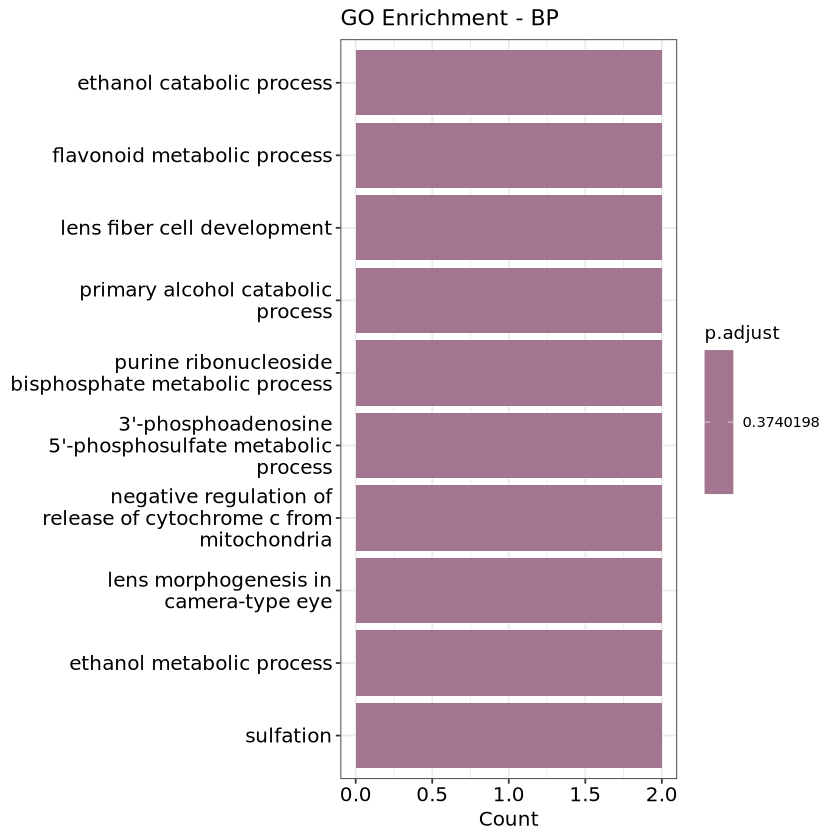

In [31]:
barplot(Aging1_sig_gene_ego, showCategory = 10, title = "GO Enrichment - BP")

In [32]:
Aging1_sig_gene_ego_cc <- enrichGO(
  gene          = unique(image_Aging1_gene$molecular_id),
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [33]:
head(Aging1_sig_gene_ego_cc, n=15)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005665,GO:0005665,"RNA polymerase II, core complex",2/81,16/22568,0.001477769,0.2653743,0.2444237,ENSG00000285437/ENSG00000047315,2
GO:0031901,GO:0031901,early endosome membrane,5/81,292/22568,0.004030523,0.2653743,0.2444237,ENSG00000188603/ENSG00000204632/ENSG00000120860/ENSG00000103043/ENSG00000234745,5
GO:0000124,GO:0000124,SAGA complex,2/81,27/22568,0.004213326,0.2653743,0.2444237,ENSG00000176476/ENSG00000189091,2
GO:0030658,GO:0030658,transport vesicle membrane,5/81,350/22568,0.008543625,0.2653743,0.2444237,ENSG00000171552/ENSG00000138674/ENSG00000204632/ENSG00000186187/ENSG00000234745,5
GO:0070461,GO:0070461,SAGA-type complex,2/81,42/22568,0.009982221,0.2653743,0.2444237,ENSG00000176476/ENSG00000189091,2
GO:0030175,GO:0030175,filopodium,3/81,127/22568,0.010793222,0.2653743,0.2444237,ENSG00000204632/ENSG00000138443/ENSG00000244355,3
GO:0098553,GO:0098553,lumenal side of endoplasmic reticulum membrane,3/81,127/22568,0.010793222,0.2653743,0.2444237,ENSG00000204632/ENSG00000101294/ENSG00000234745,3
GO:0070971,GO:0070971,endoplasmic reticulum exit site,2/81,44/22568,0.010917099,0.2653743,0.2444237,ENSG00000170248/ENSG00000138674,2
GO:0042612,GO:0042612,MHC class I protein complex,2/81,46/22568,0.011889117,0.2653743,0.2444237,ENSG00000204632/ENSG00000234745,2


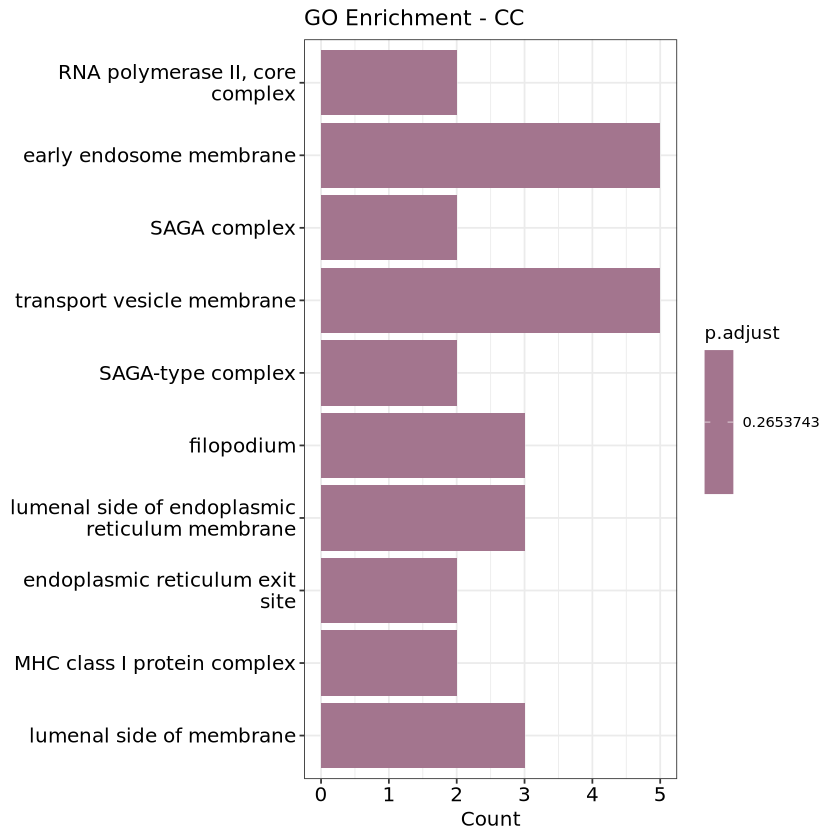

In [34]:
barplot(Aging1_sig_gene_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [35]:
image_Aging1_sig_gene_ego_mf <- enrichGO(
  gene          = unique(image_Aging1_gene$molecular_id),
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [36]:
head(image_Aging1_sig_gene_ego_mf, n=10)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0004062,GO:0004062,aryl sulfotransferase activity,2/80,10/21059,0.000628771,0.08462891,0.07647313,ENSG00000196502/ENSG00000261052,2
GO:0001055,GO:0001055,RNA polymerase II activity,2/80,12/21059,0.000917659,0.08462891,0.07647313,ENSG00000285437/ENSG00000047315,2
GO:0030170,GO:0030170,pyridoxal phosphate binding,3/80,59/21059,0.001472452,0.08462891,0.07647313,ENSG00000179889/ENSG00000167720/ENSG00000100994,3
GO:0070279,GO:0070279,vitamin B6 binding,3/80,60/21059,0.001545734,0.08462891,0.07647313,ENSG00000179889/ENSG00000167720/ENSG00000100994,3
GO:0089720,GO:0089720,caspase binding,2/80,24/21059,0.003725768,0.13753418,0.12427986,ENSG00000091106/ENSG00000140939,2
GO:0048306,GO:0048306,calcium-dependent protein binding,3/80,82/21059,0.003768060,0.13753418,0.12427986,ENSG00000188603/ENSG00000170248/ENSG00000138674,3
GO:0003899,GO:0003899,DNA-directed 5'-3' RNA polymerase activity,2/80,38/21059,0.009169537,0.25835639,0.23345831,ENSG00000285437/ENSG00000047315,2
GO:0034062,GO:0034062,5'-3' RNA polymerase activity,2/80,41/21059,0.010617386,0.25835639,0.23345831,ENSG00000285437/ENSG00000047315,2
GO:0097747,GO:0097747,RNA polymerase activity,2/80,41/21059,0.010617386,0.25835639,0.23345831,ENSG00000285437/ENSG00000047315,2


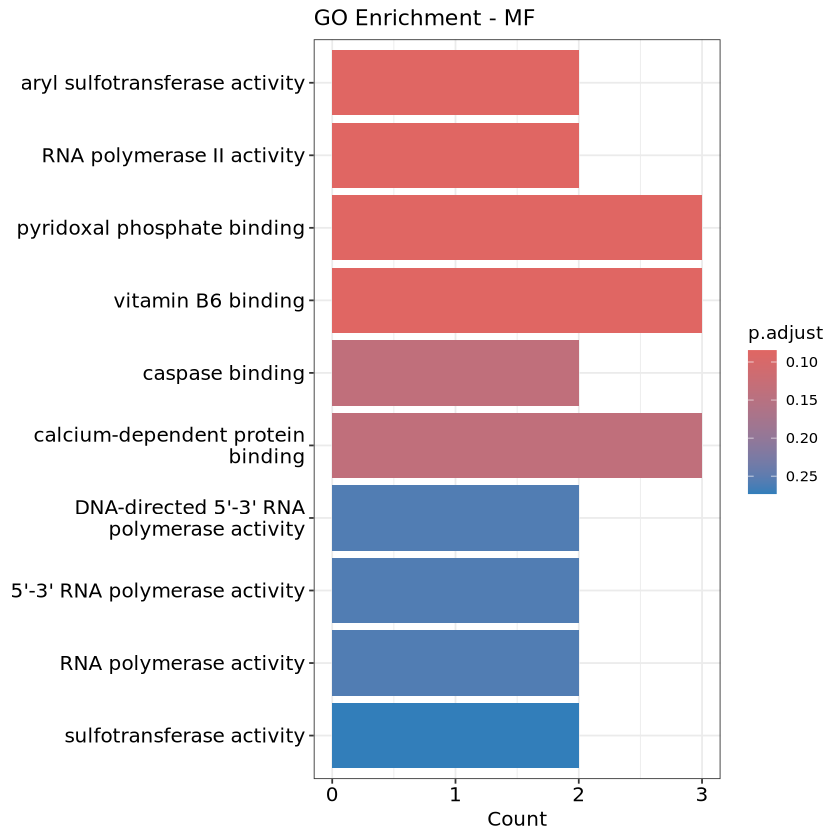

In [37]:
barplot(image_Aging1_sig_gene_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [38]:
entrez_ids <- bitr(image_Aging1_gene$molecular_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(image_Aging1_gene$molecular_id, fromType = "ENSEMBL", toType = "ENTREZID", :
“2.35% of input gene IDs are fail to map...”
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [39]:
kegg_enrich %>% head(n=20)

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05204,Human Diseases,Cancer: overview,hsa05204,Chemical carcinogenesis - DNA adducts,3/37,71/9446,0.002632880,0.1396649,0.1240867,6817/6818/124907837,3
hsa04144,Cellular Processes,Transport and catabolism,hsa04144,Endocytosis,5/37,252/9446,0.002816448,0.1396649,0.1240867,5590/10015/3135/51019/3106,5
hsa05016,Human Diseases,Neurodegenerative disease,hsa05016,Huntington disease,5/37,311/9446,0.006876050,0.1396649,0.1240867,83544/548644/84701/5431/5978,5
hsa03020,Genetic Information Processing,Transcription,hsa03020,RNA polymerase,2/37,34/9446,0.007740384,0.1396649,0.1240867,548644/5431,2
hsa05203,Human Diseases,Cancer: overview,hsa05203,Viral carcinogenesis,4/37,205/9446,0.008124994,0.1396649,0.1240867,8365/3135/55697/3106,4
hsa04922,Organismal Systems,Endocrine system,hsa04922,Glucagon signaling pathway,3/37,107/9446,0.008302356,0.1396649,0.1240867,5140/5834/55671,3
hsa05330,Human Diseases,Immune disease,hsa05330,Allograft rejection,2/37,39/9446,0.010099248,0.1396649,0.1240867,3135/3106,2
hsa05166,Human Diseases,Infectious disease: viral,hsa05166,Human T-cell leukemia virus 1 infection,4/37,224/9446,0.011014959,0.1396649,0.1240867,598/3135/55697/3106,4
hsa04940,Human Diseases,Endocrine and metabolic disease,hsa04940,Type I diabetes mellitus,2/37,44/9446,0.012736192,0.1396649,0.1240867,3135/3106,2


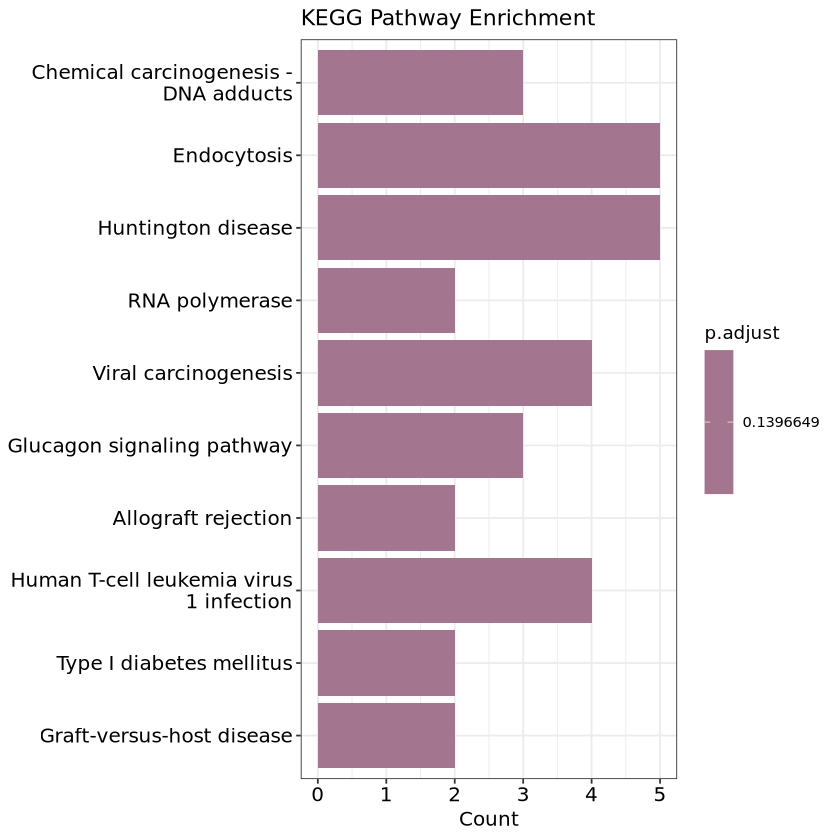

In [40]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")